# Supervised Learning
In this Jupyter notebook, we undertake an exploration and analysis of Airbnb data, building of a sentiment prediction model using traditional supervised machine learning models. 

The analysis follows a systematic approach of :
1. data preprocessing, 
2. exploratory data analysis, 
3. model building. 
4. feature engineering, 

After which, we will explore:

5. Traditional machine learning models, such as linear regression, decision trees, and support vector machines
6. Eavaluate based on accuracy, recall, precision, F1_score

For our best model, we will perform:

7. Hyperparameter tuning
8. Error analysis
9. Learning curve (Oblation) analysis
10. Evaluation of LR model using ROC curve

The goal is to contribute to a more nuanced understanding of Airbnb review text, thereby providing valuable insights for both hosts and guests.


## Modules to download

In [1]:
#from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import folium
import math
import numpy as np
import re
import seaborn as sns
#from google.colab import files
from textblob import TextBlob
import nltk 
import matplotlib.pyplot as plt
nltk.download('punkt')
pd.set_option('display.max_colwidth', None)
from tqdm import tqdm

[nltk_data] Downloading package punkt to /Users/stevenong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#pip install matplotlib
#pip install textblob
#pip install textblob
#pip install wordcloud
#pip install vaderSentiment
#pip install --upgrade scikit-learn
#pip install tensorflow

In [3]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
#from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tensorflow.keras.preprocessing.text import Tokenizer

2023-06-12 19:49:43.404022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [6]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [7]:
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve

## 1. Data pre-processing

Run the following code if using Google Colab

In [8]:
#drive.mount("/content/drive")
#path="/content/drive/MyDrive/M2/supervised_learning_df.csv"
#sl_df = pd.read_csv(path)
#pd.set_option('display.max_columns', None)
#sl_df.head()

For jupyter lab.. 

In [9]:
path="supervised_learning_df.csv"
sl_df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
sl_df.head()

,listing_id,reviewer_name,comments2,id,final_review_score,score_label
0,109,Edwin,The host canceled my reservation the day before arrival.,109,4.285714,high
1,109,Jenn,"Me and two friends stayed for four and a half months. It was a great place to stay! The apartment was very comfortable and I really enjoyed having the park with running path across the street. The only downside was it wasnt within walking distance to restaurants, bars, or coffee shops. But they are a short drive away. Overall, great stay!",109,4.285714,high
2,2708,Kuberan,i had a wonderful stay. Everything from start to the end was perfect. Will come back again.,2708,4.912857,high
3,2708,Camilla,"Charles is just amazing and he made my stay special. He is so nice, helpful and absolutely polite. Charles is always there when you need some advice or help and totally respects your privacy too. I could concentrate on my work while Charles was doing his work also absolutely quiet. The apartment is perfectly tidy, very clean, with tasty furniture and beautiful details. My bedroom even had a desk in it. Also, the apartment is located in a perfect area, most sightseeing spots are in walking distance and there are some very nice restaurants around as well. I highly recommend this place!",2708,4.912857,high
4,2708,Fallon,Staying with Chas was an absolute pleasure. He was very accommodating and respectful of personal space. He is truly a nice person. He was very helpful and I am grateful that he opened up his home to me. I am glad to have met him.,2708,4.912857,high


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License. 

## Compound score and sentiment - Postitive, Negative, Neutral

We use VADER directly on the review text (raw comments) column in our dataframe in order to provide us a comprehensive capture of sentiments and emotional intensity. VADER model generates a dictionary of four keys: 'neg', 'neu', 'pos - sentiment', and 'compound' - polarity score. 'Neg', 'neu', and 'pos' represent negative, neutral, and positive sentiments respectively, while the 'compound' key signifies the cumulative polarity score of each word in the lexicon, illustrating the overall sentiment intensity. The compound polarity score can range from -1, which implies extreme negative sentiment, to +1, reflecting extreme positive sentiment.


In [10]:
## Creating sentimental polarity function for polarity score
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments - words 
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

We apply both the compund_score and sentiment functions to our original database to create two additional columns of Sentiment_score and Sentiment.

In [11]:
## Applying Compund score
polarity_scores = sl_df["comments2"].astype("str").apply(compound_score)
sl_df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
sl_df["Sentiment"] = sl_df["Sentiment_Score"].apply(sentiment)

In [12]:
sl_df.head()

,listing_id,reviewer_name,comments2,id,final_review_score,score_label,Sentiment_Score,Sentiment
0,109,Edwin,The host canceled my reservation the day before arrival.,109,4.285714,high,0.0000,Neutral
1,109,Jenn,"Me and two friends stayed for four and a half months. It was a great place to stay! The apartment was very comfortable and I really enjoyed having the park with running path across the street. The only downside was it wasnt within walking distance to restaurants, bars, or coffee shops. But they are a short drive away. Overall, great stay!",109,4.285714,high,0.9316,Positive
2,2708,Kuberan,i had a wonderful stay. Everything from start to the end was perfect. Will come back again.,2708,4.912857,high,0.8126,Positive
3,2708,Camilla,"Charles is just amazing and he made my stay special. He is so nice, helpful and absolutely polite. Charles is always there when you need some advice or help and totally respects your privacy too. I could concentrate on my work while Charles was doing his work also absolutely quiet. The apartment is perfectly tidy, very clean, with tasty furniture and beautiful details. My bedroom even had a desk in it. Also, the apartment is located in a perfect area, most sightseeing spots are in walking distance and there are some very nice restaurants around as well. I highly recommend this place!",2708,4.912857,high,0.9909,Positive
4,2708,Fallon,Staying with Chas was an absolute pleasure. He was very accommodating and respectful of personal space. He is truly a nice person. He was very helpful and I am grateful that he opened up his home to me. I am glad to have met him.,2708,4.912857,high,0.9672,Positive


In [13]:
df = sl_df.copy()

To align the sentiment scores with our supervised learning model, we implement the following normalization function to bin the figures into 0.25 intervals. Its for us to perform data discovery, to see how many line items we have in each bin, and how skewed the data is.  

In [14]:
def normalize_score(original_score):
    """Normalize sentiment score from range [-1, 1] to [0, 5]."""
    #### this formula is to put it into a norminal scale
    normalized_score = ((original_score + 1) / 2) * 5
    ### following rounding up is to bin them into 0.25ssss
    return round(normalized_score* 4) / 4 #round(normalized_score* 2) / 2

df['normalized_Sentiment_score'] = df['Sentiment_Score'].apply(normalize_score)

In [15]:
def normalize_rating_score(original_score):
    """Normalize sentiment score from range [-1, 1] to [0, 5]."""
    #normalized_score = ((original_score + 1) / 2) * 5
    return round(original_score* 4) / 4 #round(original_score* 2) / 2

df['normalize_rating_score'] = df['final_review_score'].apply(normalize_rating_score)

In [16]:

df.isna().sum()

listing_id                    0
reviewer_name                 2
comments2                     0
id                            0
final_review_score            0
score_label                   0
Sentiment_Score               0
Sentiment                     0
normalized_Sentiment_score    0
normalize_rating_score        0
dtype: int64

In [17]:
df.to_csv('Reviews_w_sentiment_score_data.csv')

## 2. Exploratory data analysis

The subsequent code snippets were employed to facilitate a more comprehensive understanding of the underlying data.

In [18]:
## what are the column labels we have in the df
df.columns

Index(['listing_id', 'reviewer_name', 'comments2', 'id', 'final_review_score',
       'score_label', 'Sentiment_Score', 'Sentiment',
       'normalized_Sentiment_score', 'normalize_rating_score'],
      dtype='object')

In [19]:
df.describe()

,listing_id,id,final_review_score,Sentiment_Score,normalized_Sentiment_score,normalize_rating_score
count,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06
mean,4.434812e+16,4.434812e+16,4.841691e+00,8.269747e-01,4.577832e+00,4.858903e+00
std,1.645802e+17,1.645802e+17,1.485141e-01,2.491615e-01,6.343306e-01,1.803327e-01
min,1.090000e+02,1.090000e+02,2.857143e-01,-9.987000e-01,0.000000e+00,2.500000e-01
25%,9.960144e+06,9.960144e+06,4.797143e+00,8.002000e-01,4.500000e+00,4.750000e+00
50%,2.182754e+07,2.182754e+07,4.880000e+00,9.151000e-01,4.750000e+00,5.000000e+00
75%,3.974507e+07,3.974507e+07,4.931429e+00,9.623000e-01,5.000000e+00,5.000000e+00
max,8.379426e+17,8.379426e+17,5.000000e+00,9.998000e-01,5.000000e+00,5.000000e+00


In [20]:
### a quick check to see the binning has been performed correctly
df['normalized_Sentiment_score'].unique()

array([2.5 , 4.75, 4.5 , 5.  , 3.  , 4.  , 4.25, 3.25, 3.75, 3.5 , 2.25,
       0.25, 1.25, 1.5 , 0.5 , 1.75, 2.75, 0.  , 0.75, 2.  , 1.  ])

In [21]:
### a quick check to see the binning has been performed correctly
df['normalize_rating_score'].unique()

array([4.25, 5.  , 4.5 , 4.75, 4.  , 3.75, 3.25, 1.5 , 0.75, 1.75, 2.75,
       2.5 , 3.5 , 1.  , 0.5 , 2.  , 2.25, 1.25, 3.  , 0.25])

### 2.1 Rating pattern - Normalized_rating_Score vs Normalized_sentiment_Score

In [29]:
### model is imbalanced, need to trim it down. 
df["normalize_rating_score"].value_counts(normalize=False)

normalize_rating_score
5.00    685475
4.75    538597
4.50     70633
4.25     12420
4.00      2125
3.75       754
3.50       351
3.25       183
3.00       157
2.75       100
1.00        82
0.75        70
2.50        55
1.75        38
2.25        30
1.25        24
2.00        22
1.50        21
0.50        14
0.25         1
Name: count, dtype: int64

In [30]:
df["normalized_Sentiment_score"].value_counts(normalize=False)

normalized_Sentiment_score
4.75    442500
5.00    436434
4.50    174935
4.25     79067
4.00     71416
3.50     27325
3.75     26281
2.50     19320
3.25      6659
3.00      5099
2.75      2522
0.25      2418
1.75      2337
1.50      2137
2.00      2092
0.50      1968
1.25      1934
2.25      1898
1.00      1850
0.75      1748
0.00      1212
Name: count, dtype: int64

In [31]:
### To prevent under sampling

#from sklearn.utils import resample

#def undersample(df, group_size=250000):
#    dfs = []

##    for label in df["normalized_Sentiment_score"].value_counts().keys():
#        df_group = df[df["normalized_Sentiment_score"] == label]
#        df_group_undersampled = resample(df_group, 
#                                     replace=True, 
#                                     n_samples=group_size, 
#                                     random_state=0)
#    dfs.append(df_group_undersampled)

#    return pd.concat(dfs).sample(frac=1, random_state=0)

Our primary focus will be an extensive exploration of the data, with the overarching goal of ascertaining its balance. We write out a function to help in quick production of chart for quick sense check.


In [32]:
def plot_labels(df, title=None, label = "normalized_Sentiment_score"):
    
    ds_labels = df[label].value_counts(normalize=True)
    ds_labels.sort_index(inplace=True)
    plt.figure(figsize=(6,3))
    ax = ds_labels.plot(kind="bar")
    ax.set_xlabel(label)
    ax.set_ylabel("Ratio")
    if title is not None:
        plt.savefig(title + ".eps")
    plt.show()

Text(0, 0.5, 'Ratio')

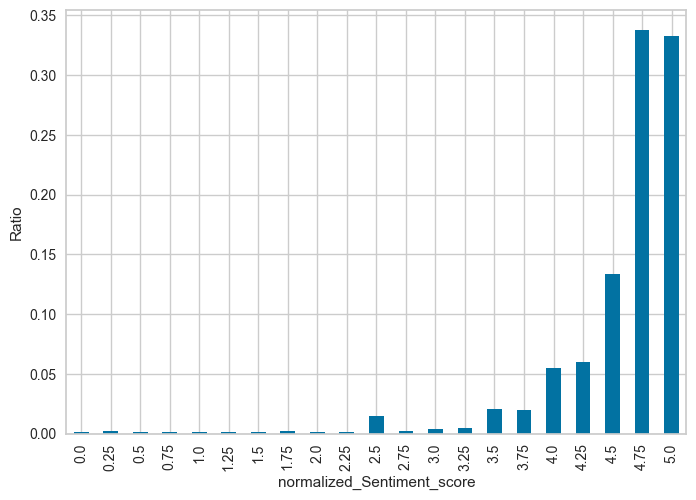

In [33]:
### There are more reviews which are 4.75 and 5.0 as compared to 4.5 and below

ds_labels = df["normalized_Sentiment_score"].value_counts(normalize=True)

ds_labels.sort_index(inplace=True)
ax=ds_labels.plot(kind="bar")
ax.set_xlabel("normalized_Sentiment_score")
ax.set_ylabel("Ratio")

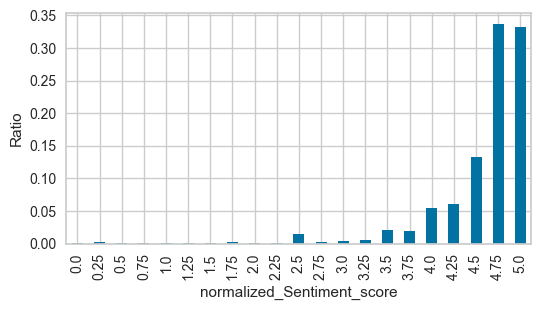

In [34]:
plot_labels(df, label = "normalized_Sentiment_score")

In [35]:
df2 = df.copy()

### 2.2 Functions to produce normalized sentiment score and rating score

- Bins the data on 0.25 intervals
- Anything below 4.0 is considered bad, will be labelled as 0
- In order to bring data from continuous to labels

In [36]:
### this is when the labelling starts

def label_score(row):
    if row['normalized_Sentiment_score'] == 5.0:
        return 4
    elif row['normalized_Sentiment_score'] == 4.75:
        return 3
    elif row['normalized_Sentiment_score'] == 4.5:
        return 2
    elif row['normalized_Sentiment_score'] == 4.25:
        return 1
    else:  # for 4.0 and lower
        return 0
    
df2['label'] = df2.apply(label_score, axis=1)

In [37]:
df2.describe()

,listing_id,id,final_review_score,Sentiment_Score,normalized_Sentiment_score,normalize_rating_score,label
count,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06,1.311152e+06
mean,4.434812e+16,4.434812e+16,4.841691e+00,8.269747e-01,4.577832e+00,4.858903e+00,2.671066e+00
std,1.645802e+17,1.645802e+17,1.485141e-01,2.491615e-01,6.343306e-01,1.803327e-01,1.350041e+00
min,1.090000e+02,1.090000e+02,2.857143e-01,-9.987000e-01,0.000000e+00,2.500000e-01,0.000000e+00
25%,9.960144e+06,9.960144e+06,4.797143e+00,8.002000e-01,4.500000e+00,4.750000e+00,2.000000e+00
50%,2.182754e+07,2.182754e+07,4.880000e+00,9.151000e-01,4.750000e+00,5.000000e+00,3.000000e+00
75%,3.974507e+07,3.974507e+07,4.931429e+00,9.623000e-01,5.000000e+00,5.000000e+00,4.000000e+00
max,8.379426e+17,8.379426e+17,5.000000e+00,9.998000e-01,5.000000e+00,5.000000e+00,4.000000e+00


We have inbalanced data

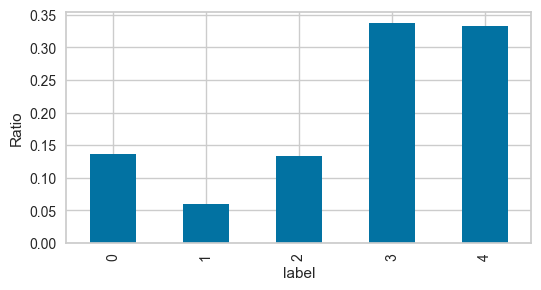

In [38]:
plot_labels(df2, label = "label")

In [39]:
len(df2[df2['label']==1])

79067

In [40]:
df2['label'].value_counts().sort_values()

label
1     79067
2    174935
0    178216
4    436434
3    442500
Name: count, dtype: int64

The subsequent section of code is dedicated to ensuring the equilibrium of the data.

In [41]:
# label count

#labels = {"Bad": 0, "Nay": 1, "Average": 2, "Good": 3, "Awesome!!": 4}.keys()

RANDOM_SEED = 42
label_count_1, label_count_2, label_count_0, label_count_4, label_count3 = df2['label'].value_counts().sort_values()

label_0 = df2[df2['label'] == 0]
label_1 = df2[df2['label'] == 1]
label_2 = df2[df2['label'] == 2]
label_3 = df2[df2['label'] == 3]
label_4 = df2[df2['label'] == 4]

print('Bad:', label_0.shape)
print('Nay:', label_1.shape)
print('Average:', label_2.shape)
print('Good:', label_3.shape)
print('Awesome:', label_4.shape)
print('Nay-lowest-count:', label_count_1)

### because label 1 is the lowest:
label_0_under = label_0.sample(label_count_1, random_state = RANDOM_SEED)
label_2_under = label_2.sample(label_count_1, random_state = RANDOM_SEED)
label_3_under = label_3.sample(label_count_1, random_state = RANDOM_SEED)
label_4_under = label_4.sample(label_count_1, random_state = RANDOM_SEED)

cleaned_df = pd.concat([label_0_under, label_1, label_2_under, label_3_under, label_4_under], axis = 0)

#label_count_1

Bad: (178216, 11)
Nay: (79067, 11)
Average: (174935, 11)
Good: (442500, 11)
Awesome: (436434, 11)
Nay-lowest-count: 79067


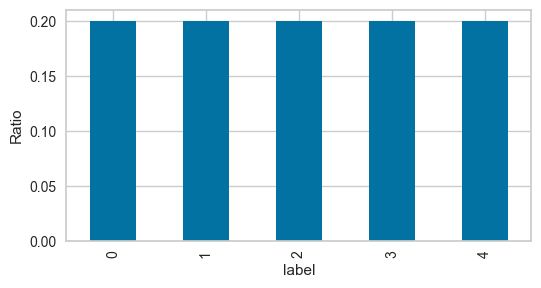

79067
79067
79067
79067
79067


In [42]:
plot_labels(cleaned_df, label = "label")
print(len(cleaned_df[cleaned_df['label']==0]))
print(len(cleaned_df[cleaned_df['label']==1]))
print(len(cleaned_df[cleaned_df['label']==2]))
print(len(cleaned_df[cleaned_df['label']==3]))
print(len(cleaned_df[cleaned_df['label']==4]))

## 3. Model building
### Splitting balanced data into df_train, df_dev, df_test
This is an important step of the model development process where data is separated into different subsets to train and evaluate the performance of machine learning models.
Objectives:
- Function to perform the data split
- checks to ensure its balanced


In [43]:

"""
    Splits the dataframe into training, validation and testing sets.

    Args:
        df (pd.DataFrame): The input dataframe.
        fractions (list-like): A list-like object of proportions for the train, validation and test set respectively, 
            e.g., for a 60%/20%/20% split, fractions could be [0.6, 0.2, 0.2].
        RANDOM_SEED (int): Seed for the random number generator.

    Returns:
        train_df (pd.DataFrame): The training set.
        val_df (pd.DataFrame): The validation set.
        test_df (pd.DataFrame): The testing set.

    Raises:
        ValueError: If the fractions do not add up to 1.
        ValueError: If the number of instances across all sets do not match the number of instances in the original dataframe."""


fractions = np.array([0.8, 0.1, 0.1])


def data_split(df, fractions, RANDOM_SEED):

    # shuffling the data:
    
    df = df.sample(frac = 1, random_state = RANDOM_SEED)
    # split into training, validation and testing sets
    train_df, val_df, test_df = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

    if len(train_df) + len(val_df) + len(test_df) != len(df):
        raise ValueError("Number of instances in splits do not match original dataframe")
        print("Check the splitting method please!")
    else:
        return train_df, val_df, test_df

In [113]:
df_train, df_dev, df_test = data_split(cleaned_df, fractions, RANDOM_SEED)

In [48]:
## Checking the data samoples spread in normalized_sentiment_score
df_train["normalized_Sentiment_score"].value_counts(normalize=False)

normalized_Sentiment_score
4.50    63400
5.00    63348
4.75    63264
4.25    63121
4.00    25401
3.50     9633
3.75     9270
2.50     6837
3.25     2330
3.00     1751
2.75      907
1.75      857
0.25      846
1.50      803
2.00      702
0.50      698
2.25      691
1.25      681
1.00      659
0.75      654
0.00      415
Name: count, dtype: int64

In [49]:
## Checking the data samoples spread within df_train, df_dev, df_test
print(df_train["label"].value_counts(normalize=False))
print(df_dev["label"].value_counts(normalize=False))
print(df_test["label"].value_counts(normalize=False))

label
2    63400
4    63348
3    63264
0    63135
1    63121
Name: count, dtype: int64
label
1    7992
0    7989
3    7895
4    7868
2    7789
Name: count, dtype: int64
label
1    7954
0    7943
3    7908
2    7878
4    7851
Name: count, dtype: int64


In [50]:
### spread of data across df_train, df_dev, df_test
print(len(df_train))
print(len(df_dev))
print(len(df_test))
print(len(df_test)+len(df_dev)+len(df_train))

316268
39533
39534
395335


In [53]:
## check shape of df_train
len(df_train)
print(df_train.shape)

(316268, 11)


(39533, 11)


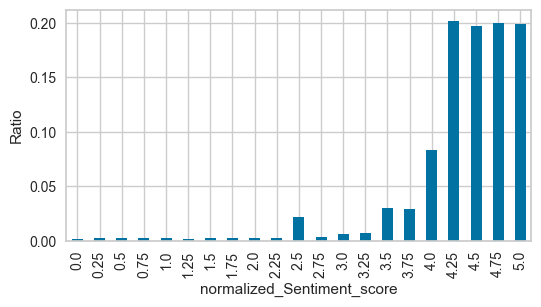

In [54]:
### check shape of df_dev
print(df_dev.shape)
plot_labels(df_dev)

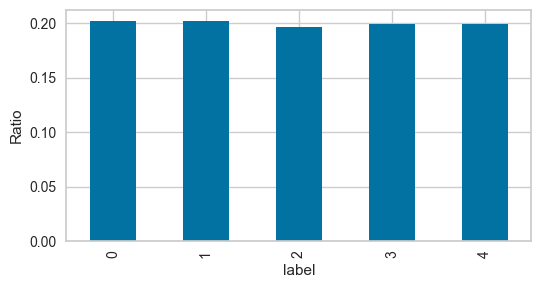

In [55]:
### ensure that its balanced
plot_labels(df_dev, label = 'label')

(39534, 11)


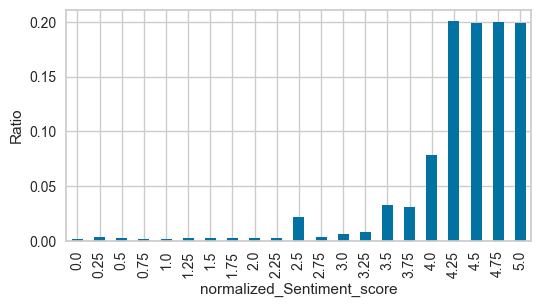

In [56]:
print(df_test.shape)
plot_labels(df_test)

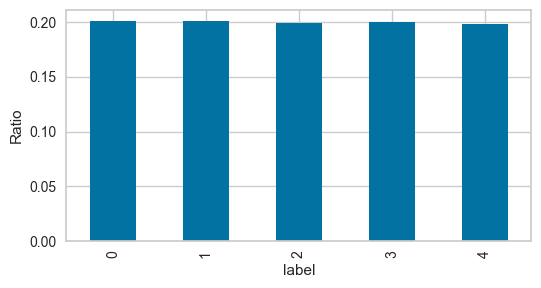

In [57]:
plot_labels(df_test, label = 'label')

In [58]:
#df_train = undersample(df)
#print(df_train.shape)
#plot_labels(df)

In [59]:
df_train.head()
df_train.shape

(316268, 11)

 ***

## 4. Feature Engineering

### Tokenization

In this part, we will tokenize reviews and count numbers of tokens for each review. This information will be useful in BERT model. But we will not use these tokens directly for training models.

In [60]:
from nltk.tokenize import word_tokenize

Parse through the first line, see what it does

In [61]:
ds_temp = df_train["comments2"].iloc[:10].map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).map(lambda comments2: comments2.split())
print(df_train["comments2"].iloc[0], '\n', ds_temp.iloc[0])

Great place. 
 ['Great', 'place']


In [62]:
%time df_train["tokens"] = df_train["comments2"].map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).map(lambda comments2: comments2.split())

CPU times: user 2.14 s, sys: 310 ms, total: 2.45 s
Wall time: 1.89 s


In [ ]:
num_train = df_train.shape[0]
num_review = df2.shape[0]

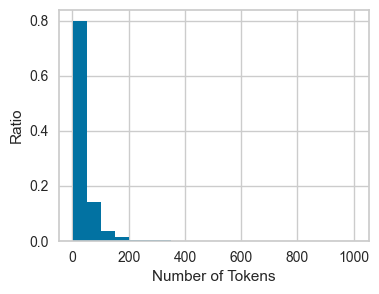

In [64]:
df_train["num_tokens"] = df_train["tokens"].map(len)
ax = df_train["num_tokens"].hist(bins=20, 
                                 figsize=(4,3),
                                 weights=np.ones(num_train)/num_train)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.show()

In [65]:
print(len(df_train[df_train["num_tokens"] <= 128]) / len(df_train["num_tokens"]))
print(len(df_train[df_train["num_tokens"] <= 256]) / len(df_train["num_tokens"]))

0.9662533041597633
0.995254025067348


df_train.drop(columns=["tokens", "num_tokens"], inplace=True)

In [66]:
%time df2["num_tokens"] = df2["comments2"].\
map(lambda comments2: re.sub(r"[^a-zA-Z0-9' ]", ' ', comments2)).\
map(lambda comments2: len(comments2.split()))

CPU times: user 6.44 s, sys: 177 ms, total: 6.62 s
Wall time: 6.34 s


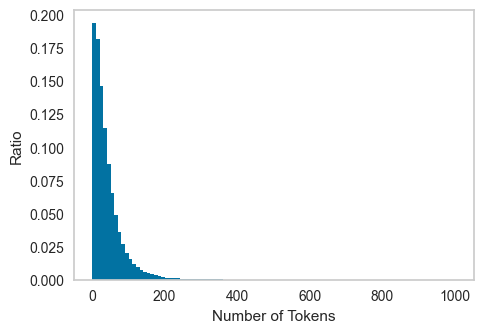

In [67]:
ax = df2["num_tokens"].hist(bins=100,
                                  figsize=(5,3.5),
                                  grid=False,
                                  weights=np.ones(num_review)/num_review)
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.savefig("num_tokens.eps")
plt.tight_layout()
plt.show()

In [68]:
print(len(df2[df2["num_tokens"] <= 128]) / len(df2["num_tokens"]))
print(len(df2[df2["num_tokens"] <= 256]) / len(df2["num_tokens"]))

0.9550608930162178
0.9943065334911589


In [69]:
df2.drop(columns=["num_tokens"], inplace=True)

From the result, we can see most reviews are shorter than 256 tokens, which is important for our use later

 ***

### Vectorization

We will try following settings for vectorization.

* Word representation: `CountVectorizer` vs. `TfidfVectorizer`
* N-grams: unigram & bigram
* Minimum document frequency: 5
* Convert to lowercase
* Use stop words
* Try binary counter

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def extract_features(df_train, df_dev, df_test):
    
    
    ### vectorization
    vectorizer = TfidfVectorizer(analyzer='word', 
                               stop_words='english',
                               ngram_range=(1, 2),
                               lowercase=True,
                               min_df=5,
                               binary=False)
    X_train = vectorizer.fit_transform(df_train["comments2"])
    X_dev = vectorizer.transform(df_dev["comments2"])
    X_test = vectorizer.transform(df_test["comments2"])
    y_train = df_train["label"].tolist()
    y_dev = df_dev["label"].tolist()
    y_test = df_test["label"].tolist()
  
    return X_train, X_dev, X_test, y_train, y_dev, y_test

In [71]:
### xtracts features from the provided dataframes (df_train, df_dev, and df_test) and splits them into corresponding feature sets 
# (represented by X_train, X_dev, X_test) and labels or target sets (represented by y_train, y_dev, y_test).
%time X_train, X_dev, X_test, y_train, y_dev, y_test = extract_features(df_train, df_dev, df_test)

CPU times: user 11.2 s, sys: 142 ms, total: 11.4 s
Wall time: 11.4 s


In [127]:
print(X_test.shape)

(39534, 139361)


In [130]:
print(df_test['comments2'])

759042                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           The house is beautiful and the hosts are lovely. The check in was very easy and the house is located in a quiet neighborhood.
608708                                                                                                                                                   

In [72]:
#print(X_train.shape), print(X_dev.shape), print(y_train.shape), print(y_dev.shape)

***

## 5. Traditional machine learning models, such as linear regression, decision trees, and support vector machines

Sde Note --> We want to find a model with highest f1_macro score. Since we feel false negative and false positive matters to us


Created functions for easy chart and table production:

In [73]:
def evaluate_model(model, model_name="model",
                   y_train_pred=None, y_dev_pred=None, y_test_pred=None):
    
    evaluate_model_Xy(model, X_train, y_train, label="Training", model_name=model_name)
    evaluate_model_Xy(model, X_dev, y_dev, label="Validation", model_name=model_name)
    evaluate_model_Xy(model, X_test, y_test, label="Testing", model_name=model_name)

In [74]:
def evaluate_model_Xy(model, X, y, y_pred=None, label="Training", model_name="model"):
    
    if y_pred is None:
        y_pred = model.predict(X)

    print(label + ' Set')
    print("Accuracy:", accuracy_score(y, y_pred))
    print()

    print(classification_report(y, y_pred, digits=4))
    #predictions = clf_lr.predict(X_test)
    #cm = confusion_matrix(y_test, predictions, labels=clf_lr.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                           display_labels=clf_lr.classes_)
    
    cm = confusion_matrix(y, y_pred, labels=model.classes_, normalize='true')
    labels = {"Bad": 0, "Nay": 1, "Average": 2, "Good": 3, "Awesome!!": 4}.keys()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=labels) #model.classes_
    
    #disp = plot_confusion_matrix(model, X, y, 
    #                           cmap=plt.cm.Blues, normalize='true')
    
    #plt.savefig(model_name + "_" + label.lower() + ".eps")
    #plt.show()
    
    disp.plot()
    plt.grid(False)
    plt.show
    print()

### 5.1 Logistic Regression


In [75]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=1.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=42,
                            solver='lbfgs',
                            max_iter=100,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1)

#clf_lr.fit(X_train, y_train)

In [76]:
clf_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

In [77]:

lr_dev_preds = clf_lr.predict(X_dev)
lr_f1_dev = f1_score(y_dev, lr_dev_preds, average='macro')
print('dev score :', lr_f1_dev)


lr_test_preds = clf_lr.predict(X_test)
lr_f1_test = f1_score(y_test, lr_test_preds, average='macro')
print('test score :', lr_f1_test)



dev score : 0.5574790952987223
test score : 0.5552889135229316


Training Set
Accuracy: 0.6222349399876055

              precision    recall  f1-score   support

           0     0.6247    0.6609    0.6423     63135
           1     0.5330    0.5549    0.5437     63121
           2     0.5458    0.4948    0.5191     63400
           3     0.5906    0.5517    0.5705     63264
           4     0.8004    0.8487    0.8238     63348

    accuracy                         0.6222    316268
   macro avg     0.6189    0.6222    0.6199    316268
weighted avg     0.6189    0.6222    0.6199    316268


Validation Set
Accuracy: 0.5615308729415931

              precision    recall  f1-score   support

           0     0.5850    0.6062    0.5954      7989
           1     0.4726    0.4936    0.4829      7992
           2     0.4559    0.4099    0.4317      7789
           3     0.5067    0.4655    0.4852      7895
           4     0.7562    0.8316    0.7921      7868

    accuracy                         0.5615     39533
   macro avg     0.5553    0.5614    0.557

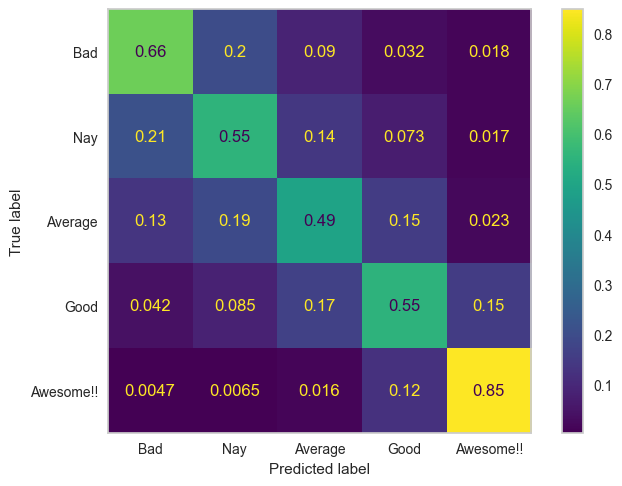

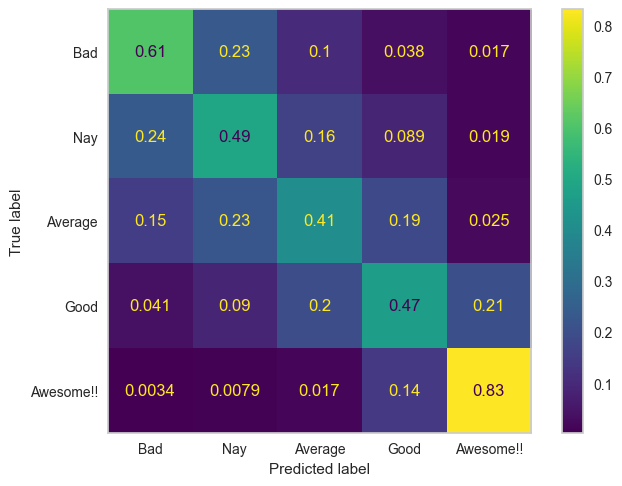

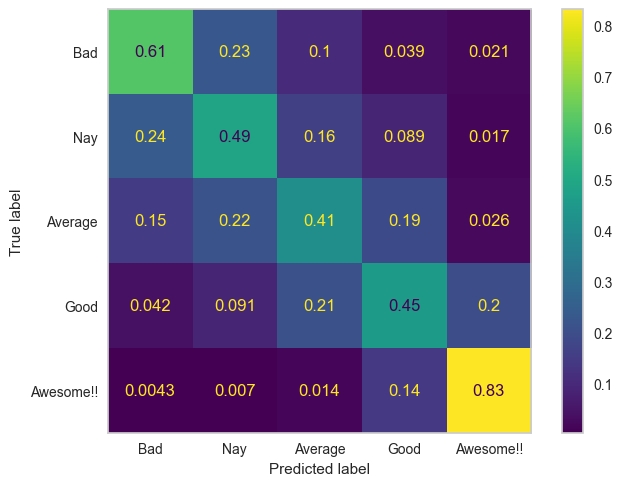

In [78]:
evaluate_model(clf_lr, model_name="lr_count_bin")

### 5.2 Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB(alpha=0.00005,
                       fit_prior=True)

In [80]:
%time clf_nb.fit(X_train, y_train)

CPU times: user 103 ms, sys: 4.2 ms, total: 108 ms
Wall time: 106 ms


MultinomialNB(alpha=5e-05)

Training Set
Accuracy: 0.6599403037929857

              precision    recall  f1-score   support

           0     0.8117    0.5333    0.6437     63135
           1     0.6130    0.7036    0.6552     63121
           2     0.6016    0.6312    0.6160     63400
           3     0.6543    0.6247    0.6392     63264
           4     0.6775    0.8066    0.7364     63348

    accuracy                         0.6599    316268
   macro avg     0.6716    0.6599    0.6581    316268
weighted avg     0.6716    0.6599    0.6581    316268


Validation Set
Accuracy: 0.41620924291098577

              precision    recall  f1-score   support

           0     0.5831    0.3350    0.4255      7989
           1     0.4317    0.4438    0.4377      7992
           2     0.3356    0.3267    0.3311      7789
           3     0.3162    0.2997    0.3077      7895
           4     0.4562    0.6762    0.5448      7868

    accuracy                         0.4162     39533
   macro avg     0.4246    0.4163    0.40

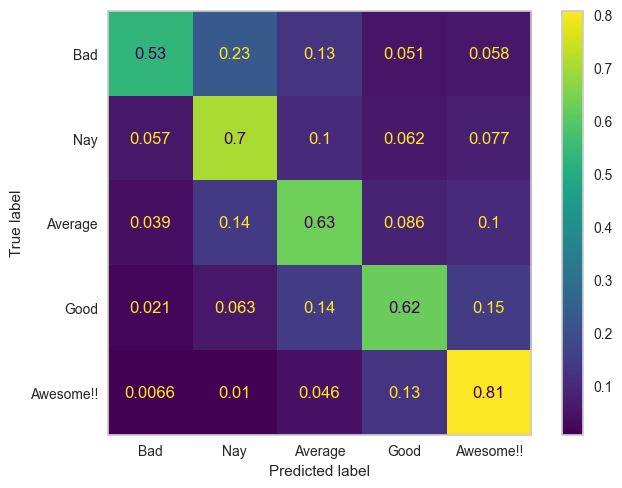

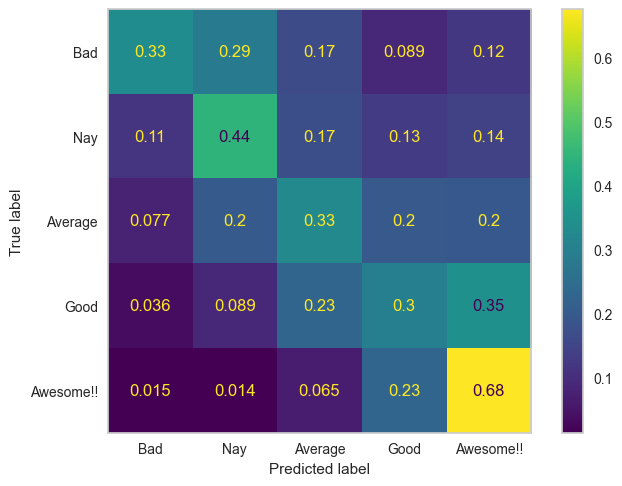

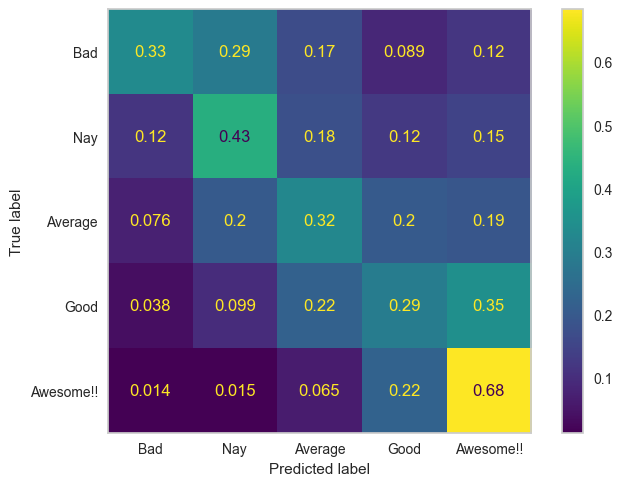

In [81]:
evaluate_model(clf_nb, model_name="nb")

### 5.3 Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=500,
                                criterion="gini",
                                max_depth=None, 
                                min_samples_split=2,
                                min_samples_leaf=10, 
                                max_features="auto", 
                                n_jobs=-1,
                                verbose=0,
                                random_state=42,
                                class_weight='balanced')

In [83]:
clf_rf.fit(X_train, y_train)

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(class_weight='balanced', max_features='auto',
                       min_samples_leaf=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

Training Set
Accuracy: 0.5872519508771042

              precision    recall  f1-score   support

           0     0.6778    0.6472    0.6622     63135
           1     0.5891    0.4894    0.5346     63121
           2     0.5570    0.4815    0.5165     63400
           3     0.5412    0.3851    0.4500     63264
           4     0.5697    0.9326    0.7073     63348

    accuracy                         0.5873    316268
   macro avg     0.5869    0.5872    0.5741    316268
weighted avg     0.5869    0.5873    0.5741    316268


Validation Set
Accuracy: 0.5577871651531632

              precision    recall  f1-score   support

           0     0.6509    0.6165    0.6332      7989
           1     0.5637    0.4637    0.5088      7992
           2     0.5143    0.4481    0.4789      7789
           3     0.4908    0.3449    0.4051      7895
           4     0.5520    0.9160    0.6888      7868

    accuracy                         0.5578     39533
   macro avg     0.5543    0.5578    0.543

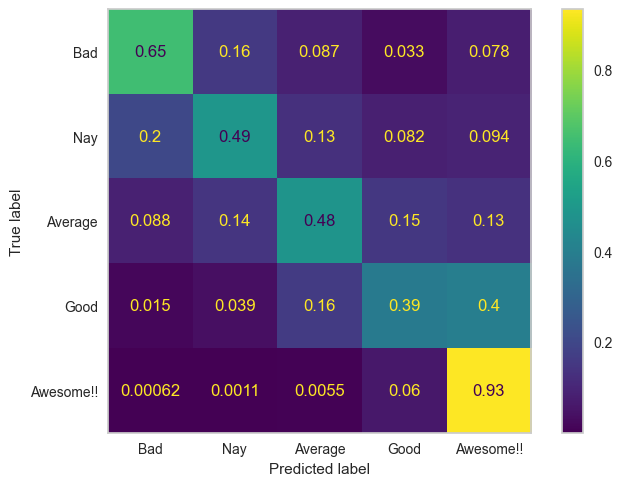

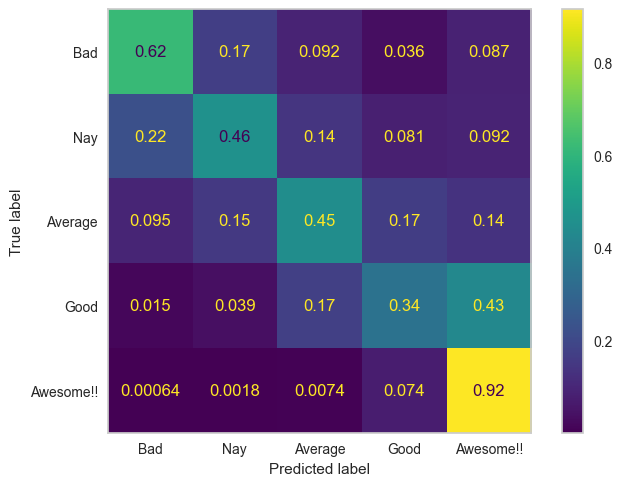

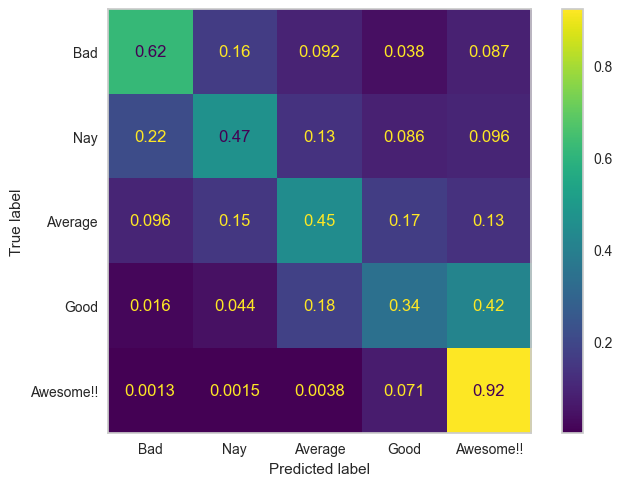

In [84]:
evaluate_model(clf_rf, model_name="rf")

### 5.4 Linear Support Vector Machine (SVM)

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf_sgd = make_pipeline(StandardScaler(with_mean=False),
                        SGDClassifier(loss='hinge',
                                      penalty='l2',
                                      alpha=30,
                                      max_iter=1000, 
                                      tol=1e-3,
                                      shuffle=True,
                                      verbose=0,
                                      n_jobs=-1,
                                      random_state=42,
                                      learning_rate='optimal',
                                      early_stopping=True,
                                      class_weight='balanced'))

In [86]:
clf_sgd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('sgdclassifier',
                 SGDClassifier(alpha=30, class_weight='balanced',
                               early_stopping=True, n_jobs=-1,
                               random_state=42))])

Training Set
Accuracy: 0.36440613656772103

              precision    recall  f1-score   support

           0     0.7951    0.3147    0.4509     63135
           1     0.5798    0.2846    0.3818     63121
           2     0.5258    0.1182    0.1930     63400
           3     0.4075    0.1092    0.1723     63264
           4     0.2751    0.9947    0.4310     63348

    accuracy                         0.3644    316268
   macro avg     0.5166    0.3643    0.3258    316268
weighted avg     0.5164    0.3644    0.3257    316268


Validation Set
Accuracy: 0.3167480332886449

              precision    recall  f1-score   support

           0     0.7066    0.2370    0.3549      7989
           1     0.5076    0.2301    0.3167      7992
           2     0.3475    0.0701    0.1167      7789
           3     0.2215    0.0569    0.0905      7895
           4     0.2631    0.9907    0.4157      7868

    accuracy                         0.3167     39533
   macro avg     0.4093    0.3169    0.25

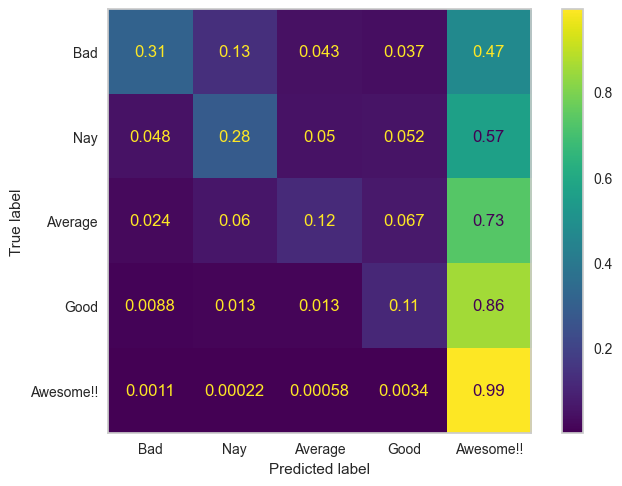

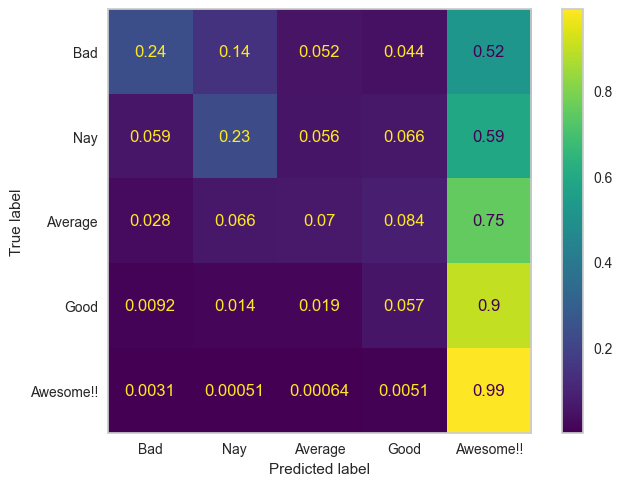

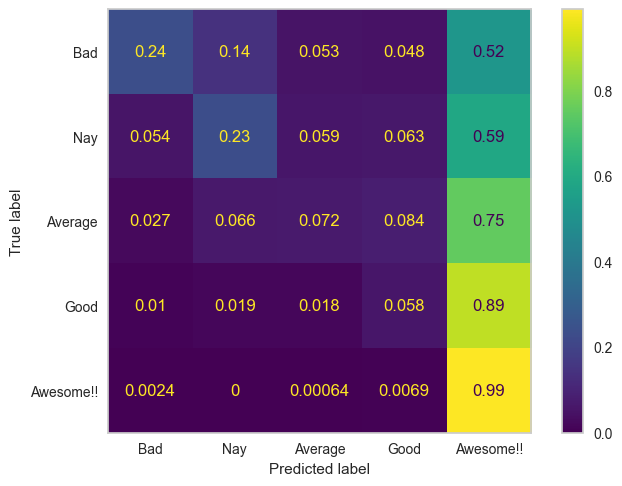

In [87]:
evaluate_model(clf_sgd, model_name="sgd")

## 6. Eavaluate based on accuracy, recall, precision, F1_score

To ensure robustness and avoid overfitting, 10-fold Cross-Validation (CV) was used during the model training phase. By dividing the dataset into 10 parts, training the model on 9 parts, testing it on the remaining part, repeating this process ten times, the results provided a more reliable and generalizable performance metric. End results is an  unbiased model evaluation metrics that provides insight into how well the model would generalize to unseen data.

In [88]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd

# Set up the cross-validation configuration
kfold = 10  # For 10-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=kfold)

# Create a dictionary to store the accuracy scores of each model
accuracy_scores = {}

# List of models
models = {'Logistic Regression': clf_lr, 
          'Naive Bayes': clf_nb, 
          'Random Forest Classifier': clf_rf, 
          'Linear Support Vector Machine (SVM)': clf_sgd}

# Scoring metrics to consider
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr']

# Initialize a dictionary to store the scores of each model
scores = {}
mean_scores = {}
# Iterate over each model
for name, model in models.items():
    # Initialize a dictionary for the current model
    scores[name] = {}
    mean_scores[name] = {}
    # Compute the cross-validation score for each metric
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring=metric)
        scores[name][metric] = score
        mean_scores[name][metric] = np.mean(score)

# Convert the dictionary to a DataFrame


df_scores = pd.DataFrame(scores)
mean_df_scores = pd.DataFrame(mean_scores)

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [89]:
df_scores = pd.DataFrame(scores)
mean_df_scores = pd.DataFrame(mean_scores)
df_scores

,Logistic Regression,Naive Bayes,Random Forest Classifier,Linear Support Vector Machine (SVM)
accuracy,"[0.5495304644765548, 0.5535460208050084, 0.5591741233755968, 0.5508268251810162, 0.5526290827457552, 0.5550320928320739, 0.5582888038701109, 0.5582571853163436, 0.5533738063618542, 0.5535951432365775]","[0.41426629145982863, 0.4182502292345148, 0.41315964207797135, 0.4196730641540456, 0.411325765959465, 0.4146773326588042, 0.417364909729029, 0.41322287918550604, 0.40795547966862705, 0.4164927591222412]","[0.5575615771334619, 0.5556012267998862, 0.5584468966389478, 0.5565497834129067, 0.5500995984443672, 0.5537989692351472, 0.5536092579125431, 0.5596800202358744, 0.5548915449313856, 0.5552077404667046]","[0.31514212539918424, 0.31988490846428685, 0.31564802225946187, 0.31884149618996427, 0.31299206374300437, 0.31469946564644136, 0.3166281974262497, 0.3143200430012331, 0.312654145323468, 0.3160690571049137]"
precision_weighted,"[0.5423478769920789, 0.5496344576569007, 0.5535427264367383, 0.5470604761825968, 0.5489353005610668, 0.5492384092233044, 0.5522916437135649, 0.5520168759112833, 0.5503746223632486, 0.5480408410842738]","[0.42346435203533256, 0.4279041474936818, 0.4212402080514627, 0.4286650750399026, 0.41956300513589406, 0.422175235524798, 0.42709609236662566, 0.4214270318035203, 0.4168220973793568, 0.4265156346378077]","[0.5537051675942223, 0.5513620116500346, 0.5540531429663783, 0.5519751228026684, 0.5454996488362992, 0.5501061513096857, 0.5496757644843979, 0.557031607634063, 0.5514166962239423, 0.5514903996474106]","[0.4113307008144345, 0.41884680817062026, 0.4096127805480796, 0.41929329596843135, 0.4022899405280222, 0.4075033656532967, 0.4109580258111167, 0.4016826539240977, 0.40118878153962884, 0.4084370502381227]"
recall_weighted,"[0.5495304644765548, 0.5535460208050084, 0.5591741233755968, 0.5508268251810162, 0.5526290827457552, 0.5550320928320739, 0.5582888038701109, 0.5582571853163436, 0.5533738063618542, 0.5535951432365775]","[0.41426629145982863, 0.4182502292345148, 0.41315964207797135, 0.4196730641540456, 0.411325765959465, 0.4146773326588042, 0.417364909729029, 0.41322287918550604, 0.40795547966862705, 0.4164927591222412]","[0.5575615771334619, 0.5556012267998862, 0.5584468966389478, 0.5565497834129067, 0.5500995984443672, 0.5537989692351472, 0.5536092579125431, 0.5596800202358744, 0.5548915449313856, 0.5552077404667046]","[0.31514212539918424, 0.31988490846428685, 0.31564802225946187, 0.31884149618996427, 0.31299206374300437, 0.31469946564644136, 0.3166281974262497, 0.3143200430012331, 0.312654145323468, 0.3160690571049137]"
f1_weighted,"[0.5447808031411396, 0.5496506075287038, 0.5552439142795338, 0.5476575049703593, 0.5498844836616669, 0.5508428143172184, 0.553956275041858, 0.5533052346669025, 0.5513752621245899, 0.54983787048186]","[0.4053136991746889, 0.4099056889682072, 0.4032451367455603, 0.41049563642354525, 0.4022813975270408, 0.40540987751647917, 0.40896432463038623, 0.4041102043581377, 0.3987329249649358, 0.4073135385328626]","[0.5414993804517368, 0.5401195947263119, 0.5422279139350648, 0.5405553573866492, 0.5340415333390897, 0.5375879487738162, 0.5375105296523583, 0.5443283520706594, 0.5391319797317585, 0.5397567225676683]","[0.25709418116005817, 0.26281415833902455, 0.25750476055302446, 0.26288628865716884, 0.2540153434702259, 0.25695817072134575, 0.2592536405563205, 0.25501648732769466, 0.2535971643889059, 0.25808848876172463]"
roc_auc_ovr,"[0.8454673324948165, 0.8468156663359444, 0.8503040330619394, 0.8464566066070814, 0.8462522293952291, 0.849629815922151, 0.8508031012717133, 0.8496088896477317, 0.8473740823811108, 0.848590905480951]","[0.7144918994325961, 0.7177517828560345, 0.7155969447658063, 0.7189669016884188, 0.7147525445744434, 0.7165945118936923, 0.7184032226646389, 0.7151376667600806, 0.7131321914092421, 0.7185954166914674]","[0.8419453081629087, 0.8423089612412893, 0.8423022766735105, 0.8427640527900249, 0.8393461488381823, 0.8414194981225572, 0.8403981520654499, 0.843956836185862, 

In [90]:
mean_df_scores

,Logistic Regression,Naive Bayes,Random Forest Classifier,Linear Support Vector Machine (SVM)
accuracy,0.554425,0.414639,0.555545,0.315688
precision_weighted,0.549348,0.423487,0.551632,0.409114
recall_weighted,0.554425,0.414639,0.555545,0.315688
f1_weighted,0.550653,0.405577,0.539676,0.257723
roc_auc_ovr,0.848130,0.716342,0.841647,NaN


In [91]:
mean_df_scores.transpose().round(3)

,accuracy,precision_weighted,recall_weighted,f1_weighted,roc_auc_ovr
Logistic Regression,0.554,0.549,0.554,0.551,0.848
Naive Bayes,0.415,0.423,0.415,0.406,0.716
Random Forest Classifier,0.556,0.552,0.556,0.540,0.842
Linear Support Vector Machine (SVM),0.316,0.409,0.316,0.258,NaN


In [92]:
#%pip install simpletransformers
from simpletransformers.classification import ClassificationModel

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## 7. Hyperparameter tuning

In the hyperparameter tuning, instead of picking all models, we decide to perform the tuning for the logistic regresson model through a randomized search with cross-validation. Decision was made due to time and resources constraint, logistic regression model is the most efficient model. 


In [99]:
clf_lr = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=5.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=42,
                            solver='lbfgs',
                            max_iter=100,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1)

search_parameters = {"solver": ['lbfgs', 'liblinear'],
         "penalty": ['none', 'l1', 'l2', 'elasticnet'],
         "C": [0.001, 0.01, 0.1, 1, 5, 10],
         "multi_class": ['auto', 'ovr']}

search = RandomizedSearchCV(clf_lr, search_parameters, 
                            n_iter = 500, 
                            scoring = 'f1_macro', 
                            random_state = 42)

result = search.fit(X_train, y_train)
result.best_params_

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 96 is smaller than n_iter=500. Running 96 iterations. For exhaustive searches, use GridSearchCV.

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/Users/stevenong/opt/anaconda3/envs/tensorflow/l

{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'C': 5}

In [100]:
### X_train, X_dev, X_test, y_train, y_dev, y_test



best_solution = {'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'auto', 'C': 5}

default_model = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=1.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=0,
                            solver='lbfgs',
                            max_iter=500,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1,
       
                                  ).fit(X_train, y_train)


tuned_model = LogisticRegression(penalty= 'l2',
                            tol=1e-4,
                            C=5.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=0,
                            solver='lbfgs',
                            max_iter=500,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1,    
                                ).fit(X_train, y_train)

evaluation_models = [default_model, tuned_model]


accuracy = []
precision = []
recall = []
f1score = []
roc_auc = []
logloss_ = []


for model in evaluation_models:
    
    model_predict = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, model_predict))
    precision.append(precision_score(y_test, model_predict, average = 'macro'))
    recall.append(recall_score(y_test, model_predict, average = 'macro'))
    f1score.append(f1_score(y_test, model_predict, average = 'macro'))
    roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test),  multi_class = 'ovr', average = 'macro'))
    logloss_.append(log_loss(y_test, model.predict_proba(X_test)))

model_names = ["LogisticRegression (Default)", "LogisticRegression (Tuned)"]
pd.DataFrame(list(zip(model_names, accuracy, precision, recall, f1score, roc_auc, logloss_)),
               columns =['Classifier', 'Accuracy (Balanced)', 
                         'Precision (Macro)', 'Recall (Macro)', 
                         'F1 Score (Macro)',  
                         'AUC ROC Score', 'Log Loss'])


,Classifier,Accuracy (Balanced),Precision (Macro),Recall (Macro),F1 Score (Macro),AUC ROC Score,Log Loss
0,LogisticRegression (Default),0.578439,0.572291,0.578752,0.574603,0.861394,0.994630
1,LogisticRegression (Tuned),0.581449,0.579124,0.581739,0.580199,0.862653,0.982874


## 8. Learning curve (Oblation) analysis

We are going to conduct error analysis over the trained Logistic Regression model. We will firstly have an overview on the error distribution of our model. Then we will look into details on sampled records to investigate the error in these line items


In [106]:
tuned_lr_test_preds = tuned_model.predict(X_test)
tuned_lr_f1_test = f1_score(y_test, tuned_lr_test_preds, average='macro')
print(tuned_lr_f1_test)


0.580198627892542


In [170]:
df_test.head()

,listing_id,reviewer_name,comments2,id,final_review_score,score_label,Sentiment_Score,Sentiment,normalized_Sentiment_score,normalize_rating_score,label
759042,25974295,Priyanka,The house is beautiful and the hosts are lovely. The check in was very easy and the house is located in a quiet neighborhood.,25974295,4.801429,high,0.8977,Positive,4.75,4.75,3
608708,20423380,Theo,Eddie is very responsive and always around. Respectful of your timespace.,20423380,4.862857,high,0.6997,Positive,4.25,4.75,1
153490,3215956,Nancy,In reading the past review I agree with most everything. We were there to attend a wedding so we did not spend much time there. The house needs attention to detail. Nice but could be spectacular with a few improvements.,3215956,4.828571,high,0.6808,Positive,4.25,4.75,1
987804,40180661,Patty,Youll love this place!,40180661,4.894286,high,0.6696,Positive,4.25,5.00,1
830385,30122696,Marc,"A great property, great location. Just as advertised, no surprises. Would def recommend and stay again!",30122696,4.818571,high,0.8841,Positive,4.75,4.75,3


In [172]:
# Get a DataFrame for comparison
df_test_evaluation = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': tuned_lr_test_preds, 'comments' : df_test['comments2'], 'rating score': df_test['normalize_rating_score']})
# Filter instances where the true label is 1 and the predicted label is not 1
misclassified_as_1 = df_test_evaluation[(df_test_evaluation['True Labels'] == 1) & (df_test_evaluation['Predicted Labels'] != 1)]

# Filter instances where the true label is 2 and the predicted label is not 2
misclassified_as_2 = df_test_evaluation[(df_test_evaluation['True Labels'] == 2) & (df_test_evaluation['Predicted Labels'] != 2)]

# Concatenate the two dataframes
misclassified_df = pd.concat([misclassified_as_1, misclassified_as_2])

misclassified_df.to_csv('error_checks.csv')

## 9. Learning curve (Oblation) analysis


Learning curve analysis

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

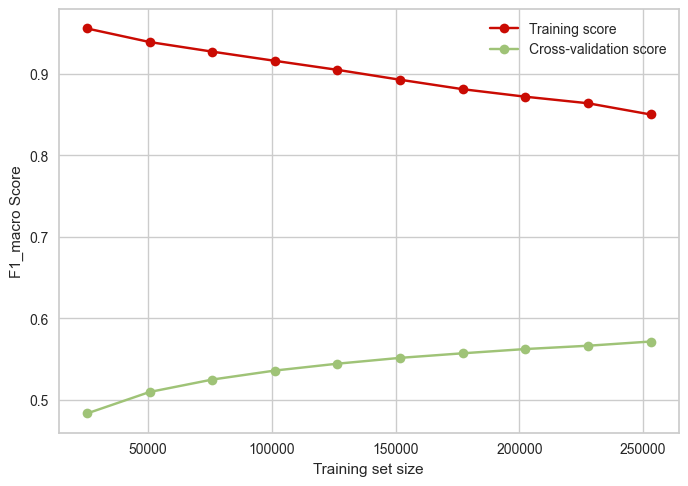

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [169]:
from sklearn.model_selection import learning_curve

tuned_model = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=5.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=0,
                            solver='lbfgs',
                            max_iter=500,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1,  
                                  )



train_sizes, train_scores, val_scores = learning_curve(tuned_model, X_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10), scoring='f1_macro', cv=5)
#np.linspace(0.1, 1.0, 10
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('F1_macro Score')
plt.legend(loc='best')
plt.show()




In [102]:
tuned_model = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=5.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=0,
                            solver='lbfgs',
                            max_iter=500,
                            multi_class='auto',
                            verbose=0,
                            n_jobs=-1,  
                                  )

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(tuned_model, X_train, y_train,
                                                            # Number of folds in cross-validation
                                                            cv=10,
                                                            # Evaluation metric
                                                            scoring='f1_macro',
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#6B433F",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#6B433F", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#3F676B")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#3F676B")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("f1_macro Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

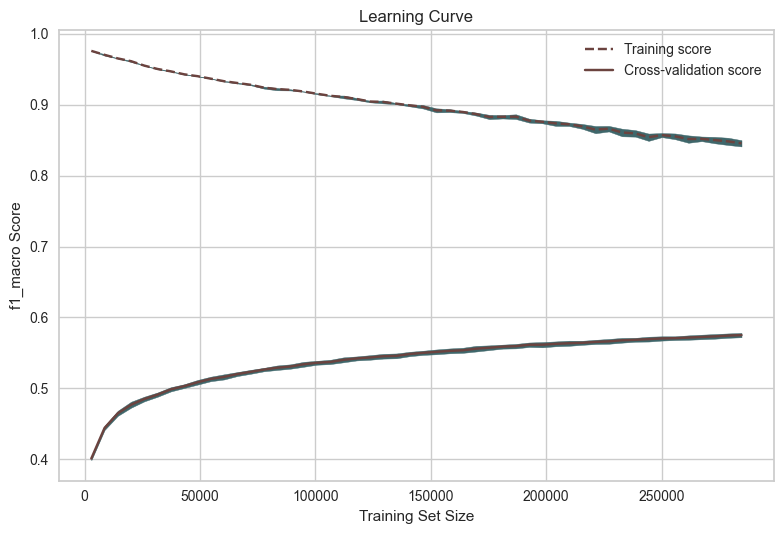

In [103]:
plot_learning_curve(model, X_train, y_train)

***

## 10. Evaluation of LR model using ROC curve

**ROC-AUC Curve plots**

In [100]:
### X_train, X_dev, X_test, y_train, y_dev, y_test
#labels = {"Bad": 0, "Nay": 1, "Average": 2, "Good": 3, "Awesome!!": 4}.keys()


def plot_ROC_curve(model, X_train, y_train, X_dev, y_dev):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder = {0: 'Bad', 
                                          1: 'Nay', 
                                          2: 'Average',
                                         3: 'Good',
                                          4: 'Awesome!!'
                                             
                                         },
                        
                        
                        
                        fig = plt.figure(figsize=(8,5)))
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_dev, y_dev)
    visualizer.show()
    
    return visualizer

In [101]:
def precision_recall_curve_plot(model, X_train, y_train, X_val, y_val):
    
    visualizer = PrecisionRecallCurve(model, per_class = True, fill_area = False, iso_f1_curves = True, fig = plt.figure(figsize=(8,5)))
    visualizer.fit(X_train, y_train)
    visualizer.score(X_dev, y_dev)
    visualizer.show()
    
    return visualizer

  0%|                                                     | 0/2 [00:00<?, ?it/s]/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  9.48197D+02


 This problem is unconstrained.



At iterate   50    f=  1.13312D+05    |proj g|=  7.32529D+02

At iterate  100    f=  9.98933D+04    |proj g|=  3.64496D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    117      1     0     0   3.645D+02   9.989D+04
  F =   99893.258325200921     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  2.75166D+03


 This problem is unconstrained.



At iterate   50    f=  1.59073D+05    |proj g|=  4.62440D+02

At iterate  100    f=  1.43896D+05    |proj g|=  2.50169D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    118      1     0     0   2.502D+02   1.439D+05
  F =   143895.76866593136     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  4.81798D+02


 This problem is unconstrained.



At iterate   50    f=  1.68124D+05    |proj g|=  2.69275D+02

At iterate  100    f=  1.55799D+05    |proj g|=  2.17414D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    120      1     0     0   2.174D+02   1.558D+05
  F =   155798.87100768517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  9.41862D+02


 This problem is unconstrained.



At iterate   50    f=  1.61563D+05    |proj g|=  4.04806D+02

At iterate  100    f=  1.52253D+05    |proj g|=  4.31032D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    121      1     0     0   4.310D+01   1.523D+05
  F =   152252.53910010203     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  1.51941D+03


 This problem is unconstrained.



At iterate   50    f=  5.04470D+04    |proj g|=  4.42981D+01

At iterate  100    f=  4.88704D+04    |proj g|=  9.90269D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    117      1     0     0   9.903D+00   4.887D+04
  F =   48870.352125042664     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


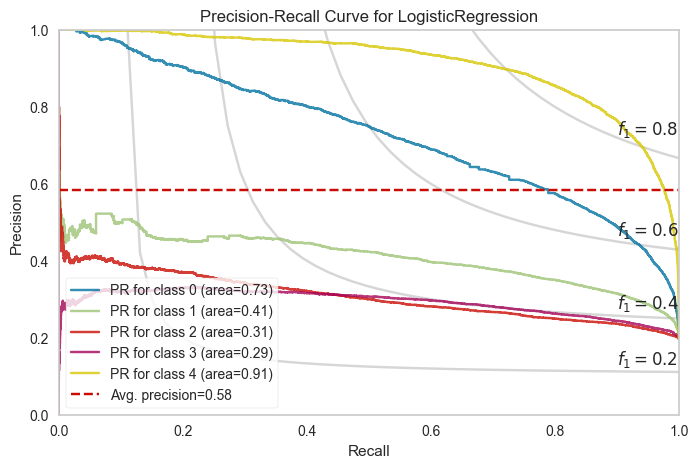

 50%|██████████████████████▌                      | 1/2 [00:31<00:31, 31.19s/it]/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  9.48197D+02


 This problem is unconstrained.



At iterate   50    f=  1.13312D+05    |proj g|=  7.32529D+02

At iterate  100    f=  9.98933D+04    |proj g|=  3.64496D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    117      1     0     0   3.645D+02   9.989D+04
  F =   99893.258325200921     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  2.75166D+03


 This problem is unconstrained.



At iterate   50    f=  1.59073D+05    |proj g|=  4.62440D+02

At iterate  100    f=  1.43896D+05    |proj g|=  2.50169D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    118      1     0     0   2.502D+02   1.439D+05
  F =   143895.76866593136     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  4.81798D+02


 This problem is unconstrained.



At iterate   50    f=  1.68124D+05    |proj g|=  2.69275D+02

At iterate  100    f=  1.55799D+05    |proj g|=  2.17414D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    120      1     0     0   2.174D+02   1.558D+05
  F =   155798.87100768517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  9.41862D+02


 This problem is unconstrained.



At iterate   50    f=  1.61563D+05    |proj g|=  4.04806D+02

At iterate  100    f=  1.52253D+05    |proj g|=  4.31032D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    121      1     0     0   4.310D+01   1.523D+05
  F =   152252.53910010203     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       139362     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19220D+05    |proj g|=  1.51941D+03


 This problem is unconstrained.



At iterate   50    f=  5.04470D+04    |proj g|=  4.42981D+01

At iterate  100    f=  4.88704D+04    |proj g|=  9.90269D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****    100    117      1     0     0   9.903D+00   4.887D+04
  F =   48870.352125042664     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.0s finished


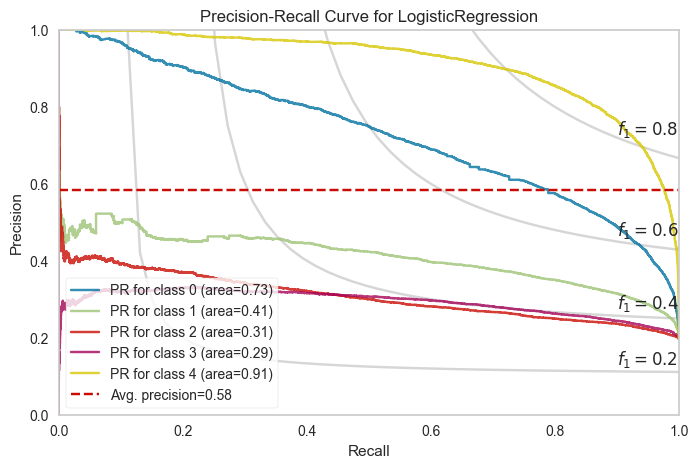

100%|█████████████████████████████████████████████| 2/2 [01:02<00:00, 31.42s/it]


In [102]:
for model in tqdm(evaluation_models):
    
    precision_recall_curve_plot(clf_lr, X_train, y_train, X_test, y_test)

  0%|                                                     | 0/2 [00:00<?, ?it/s]

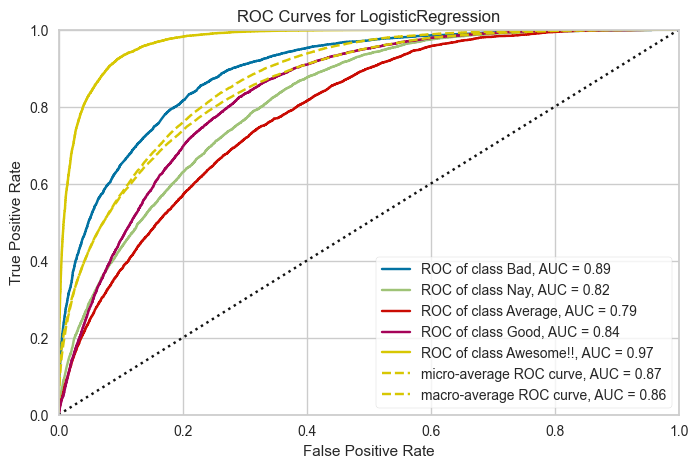

 50%|██████████████████████▌                      | 1/2 [00:00<00:00,  3.04it/s]

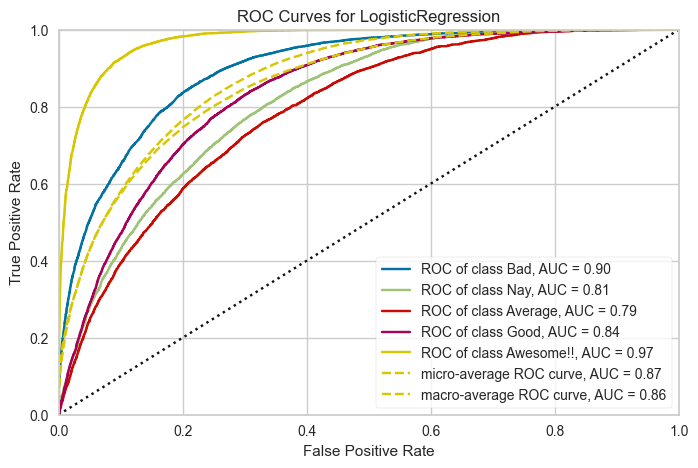

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  3.01it/s]
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenong/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer

In [103]:
for model in tqdm(evaluation_models):
    
    plot_ROC_curve(model, X_train, y_train, X_test, y_test)

***

----- END of Code ----